Exercise 2: Working with Image Data
----------------------------------------------------------------------------------
The goal of this exercise is become familiar with using numpy and matplotlib image manipulation and graphing.

* You will need to separately download the file AQUA.2013089.2055.mat This file is a matlab file. It is basically a multispectral image that was originally obtained from NASA http://rapidfire.sci.gsfc.nasa.gov/realtime/. The file I am giving you is a "real" data file ... it is big 51MB! 

**Please don't check this into any repo.**

**Please don't check this into any repo.**

**Please don't check this into any repo.**

http://glasslab.engr.ccny.cuny.edu/u/grossberg/data/AQUA.2013089.2055.mat

NASA publishes satillite images in hdf and netcdf formats (mostly). Unfortunately, often this formats need additional libraries to be read easily so we have reformatted this to a matlab format which is easy to read.

    from scipy.io import loadmat
    
imports a function that can read the files. 

In [13]:
%matplotlib inline
import numpy as np
import matplotlib


import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import loadmat
data = loadmat('AQUA.2013089.2055.mat')

In [4]:
print(data.keys())

dict_keys(['__globals__', 'B3', 'B1', 'B6', 'B2', 'B5', '__version__', '__header__', 'RGB', 'ICE', 'B4', 'B7'])


In [5]:
data['B1'].shape

(914, 667)

In [6]:
print('max:',data['B1'].max())
print('min:',data['B1'].min())
print('mean:',data['B1'].mean())

max: 1.03584373503
min: 0.385050565202
mean: 0.732060335914


In [7]:
print('max:',round(data['B1'].max(),2))
print('min:',round(data['B1'].min(),2))
print('mean:',round(data['B1'].mean(),2))

max: 1.04
min: 0.39
mean: 0.73


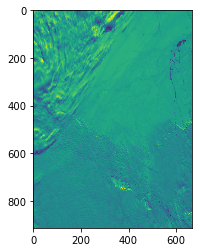

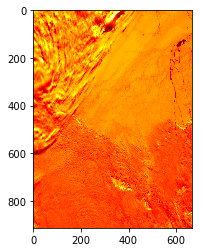

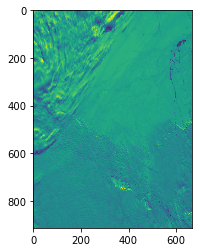

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(data['B1'])
plt.show()

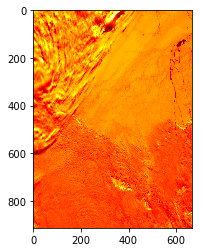

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
ax.imshow(data['B1'], cmap = cmap)
plt.show()

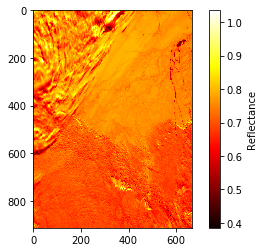

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
fig_image = ax.imshow(data['B1'], cmap = cmap)
cax = fig.colorbar(fig_image, ax = ax)
cax.set_label("Reflectance")
plt.show()

KeyboardInterrupt: 

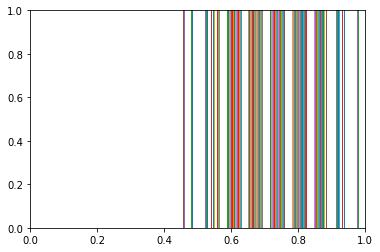

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig_image = ax.hist(data['B1'])
#plt.show()

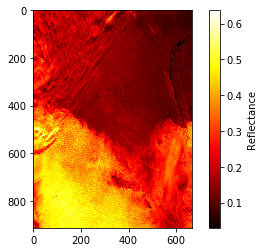

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cmap = plt.get_cmap('hot')
fig_image = ax.imshow(data['B6'], cmap = cmap)
cax = fig.colorbar(fig_image)
cax.set_label("Reflectance")
plt.show()

Looks somewhat different. One way to compare the bands would be to do a scatter plot of the values of Band 1 vs Band 6. The problem is that there are too many pixels.

1. Find the total number of pixels in the image using data['B1'].shape, call that **number** N
2. We will set a sample percentage which we call spercentage as .45%  This should be around 4K points.
3. Number of samples we will use will be N*spercentage which should be around 4K points
4. To randomly choose points here is a snipit of code to get random indices:
    
        samplesInds =range(1,N)
        np.random.shuffle(samplesInds)
        samplesInds = samplesInds[0:numSamps]
    
5. Lets call the image b1=data['B1']. Then b1.ravel()[sampleInds] are the values at the sampled pixels. Make a scatter plot of sampled b1 (x-axis) vs b6 (y-axis) where b6 are the corresponding points from Band 6, 'B6'.
6. Title the image "A comparison of Band 1 and Band 6 Reflectance." 
7. Title the x-axis Band 1 Reflectance and y Band 6 Reflectance
8. All the dots at this point may look like a big jumble. Set the alpha (transparency) low enough so you can see where the dots are bunching up.
9. Chose an size (other than default), color, and marker.

One thing we like to do is compare with a linear regression. If the data fits a line then there should be a good corrolation between line fit and the data.

10. Use the polyfit function to fit the B1 samples vs. the B6 samples to get a line fit.
11. Use polyval (on two x values ... one just below the min (90%) and one just above max (110%)) to get a bet fit line.
12. Show the line (plot) in red on top of the samples.
13. Make sure you have a legend that says "Linear regression line"
14. Compute the slope and use matplotlibs "text" function to put a label "slope = " (the slope value) on the graph. You will need to manually adjust the position so it doesn't block other elements.
15. From scipy stats use get the pearson corrlollation coefficient and use the text to put that on the graph.
16. Do the same for Band 7 vs Band 6. Which is more related?

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


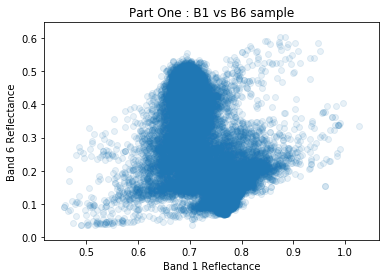

In [35]:
N = 914*667
spercentage = 0.045
numSamps = N*spercentage
samplesInds = np.array(range(1,N))
np.random.shuffle(samplesInds)
samplesInds = samplesInds[0:numSamps]

b1 = data['B1']
b6 = data['B6']
plt.scatter(b1.ravel()[samplesInds], b6.ravel()[samplesInds],alpha= 0.1)
plt.xlabel('Band 1 Reflectance')
plt.ylabel('Band 6 Reflectance')
plt.title('Part One : B1 vs B6 sample')

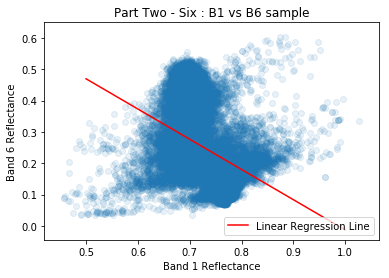

In [39]:
from scipy import stats as stats

coeff = np.polyfit(b1.ravel()[samplesInds], b6.ravel()[samplesInds], 1)
plt.scatter(b1.ravel()[samplesInds], b6.ravel()[samplesInds], alpha = 0.1)
plt.xlabel('Band 1 Reflectance')
plt.ylabel('Band 6 Reflectance')
plt.plot([0.5,1.0], np.polyval(coeff, [0.5,1.0]), color = 'red', label = 'Linear Regression Line')
plt.legend(loc = 'lower right')
slope = format(((np.polyval(coeff, 1.0) - np.polyval(coeff, 0.5))/(1.0-0.9)))
pearson = format(stats.pearsonr(b1.ravel()[samplesInds], b6.ravel()[samplesInds])[0])
plt.title('Part Two - Six : B1 vs B6 sample')